Image gradients, denoisy


In [18]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import imageio
from skimage import data
from skimage.color import rgb2gray
import copy as C

Read in an image. You can read in any image.  replace with any image of your choice below. 

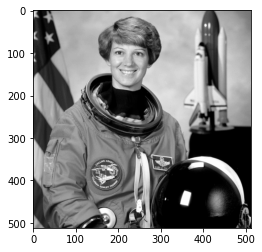

In [19]:
img = imageio.imread('imageio:astronaut.png',as_gray=True)
plt.figure()
plt.imshow(img, cmap='gray')


### image derivative
###  set up filters
### take derivative

In [20]:
dx = np.array([1,-1])
s1 = np.array([1,1])
dy = np.array([1,-1])
s =s1[None,:]

##Demo: convolve with the image using above filters
###hint: using convolve1d, first convolve in x directon and then in y. 

In [21]:
x = ndimage.convolve1d(img,dx,axis= 0)

gx_I = ndimage.convolve(x,s)

y = ndimage.convolve1d(img,dx,axis= 1)
gy_I = ndimage.convolve(y,s)
# alternative, you can use np.gradient()
gx_I,gy_I = np.gradient(img)[:2]

## Exericse 1: image filtering
### Can you design a smooth gradient filter that just perform the convolution operation once and extract the edge of the images?  Think of what type of filter it is. 
### plot the gradients images and the magnitudes, use subplot.


In [29]:
import cv2 
# reference: https://scipy-lectures.org/advanced/image_processing/#blurring-smoothing

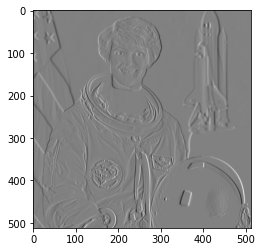

In [30]:
Gx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
Edged_img = cv2.filter2D(img, -1, Gx)
plt.imshow(Edged_img, cmap = "gray")

# Exercise 2: Image De-noise. Add salt and pepper to the image 

In [40]:
from scipy import misc
f = misc.face(gray=True)
f = f[230:290, 220:320]
noisy = f + 0.4 * f.std() * np.random.random(f.shape)

In [37]:
gauss_denoised = ndimage.gaussian_filter(noisy, 2)
med_denoised = ndimage.median_filter(noisy, 3)
im = np.zeros((20, 20))
im[5:-5, 5:-5] = 1
im = ndimage.distance_transform_bf(im)
im_noise = im + 0.2 * np.random.randn(*im.shape)
im_med = ndimage.median_filter(im_noise, 3)

In [38]:
noisy = img + 0.4 * img.std() * np.random.random(img.shape)
# # adding salt and peper noise to the image 
# # adding salt
num_salt = np.ceil(0.05 * img.size * 0.5)
coords = [np.random.randint(0, i - 1, int(num_salt))
                 for i in img.shape]
out=C.copy(l)                
out[coords] = 255
# # adding pepper
num_pepper = np.ceil(0.05* img.size * (1. - 0.05))
coords = [np.random.randint(0, i - 1, int(num_pepper))
                   for i in img.shape]
out[coords] = 0
out=out.reshape(img.shape)

NameError: ignored

In [39]:
plt.figure()
plt.imshow(out, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('added gaussian noise', fontsize=20)

NameError: ignored

<Figure size 432x288 with 0 Axes>

## gaussian denoise?
## can you remove the noise by using guassian filter? try also box filter and median filter. nd.gaussian_filter, etc. 
## plot the denised image. Plot as subplots. 

# Exercise 3: 
a) Generate an image of a rotated rectangle. you can create a rectnagle by filling center pixels 1 and the rest zero. ndimage.rotate can be used to roate the image. 
b) Blur the image using a Guassian filter. 
c) apply sobel filter to both x and y directon
d) Display the original image, x-derivatives, y-derivatives. use np.hypot to compute the magnitude. 

In [41]:
im = np.zeros((256,256));
im[64:64,64:-64] = 1
